**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/diabetes.csv")
df.head()
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Data Pre-processing**

In [2]:
df = df.replace(0.0,np.NaN)
df.fillna(method='bfill',inplace=True)
df.fillna(method='ffill',inplace=True)
#Normalisation i =1 
df.to_csv("dis_notNormal.csv",index=False,header=False)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
y = df['Outcome'].values
print(type(y))
df =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
          columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'])
df['Outcome'] = y

<class 'numpy.ndarray'>


**Data Visualisations**

- Histogram Visualisation

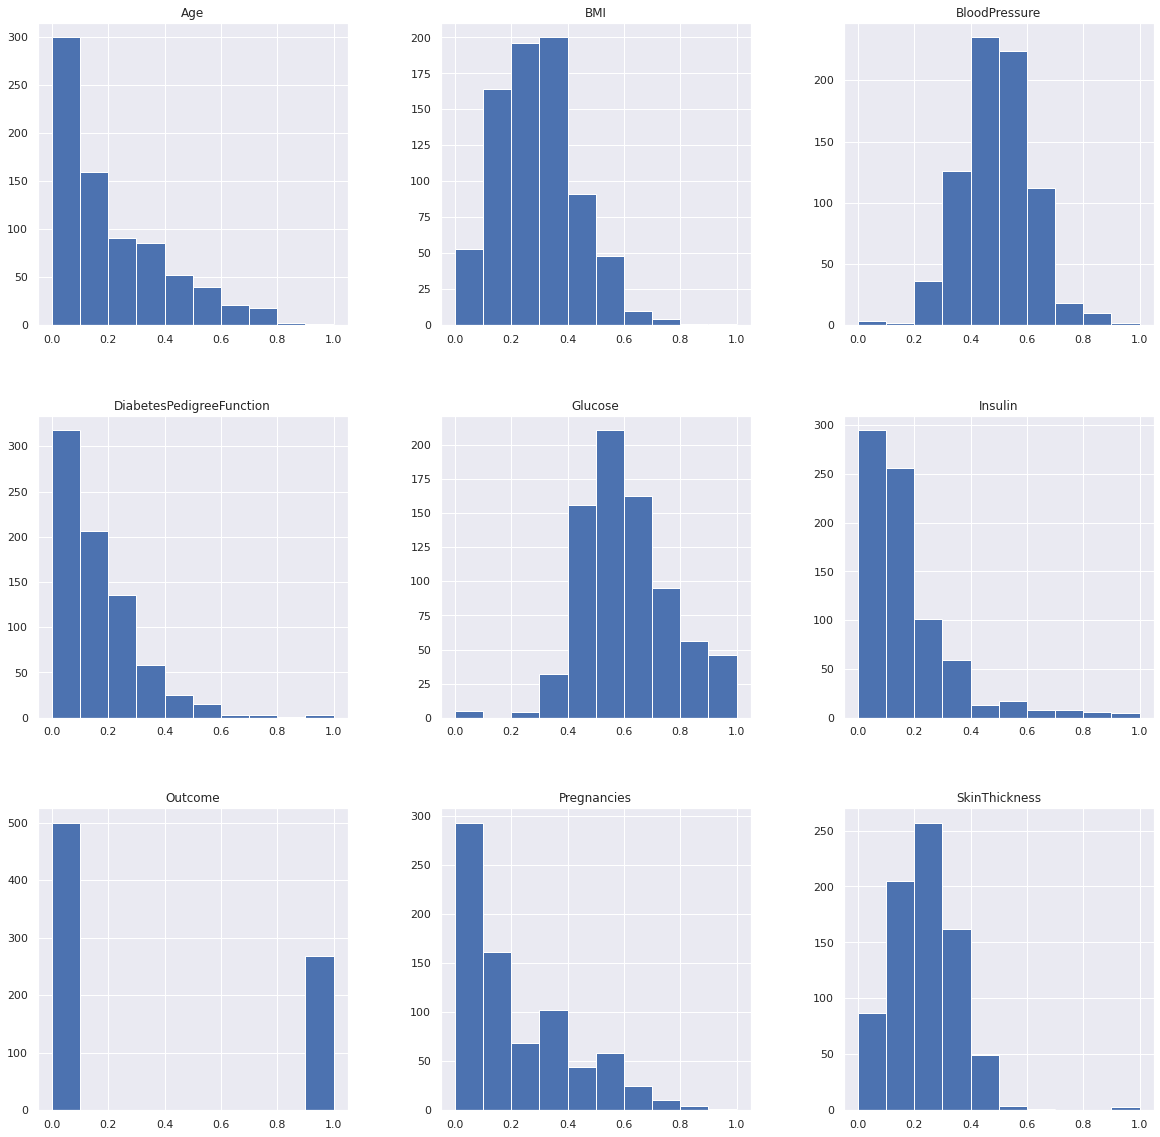

In [3]:
p = df.hist(figsize = (20,20))

- Visualisation by Pairplot

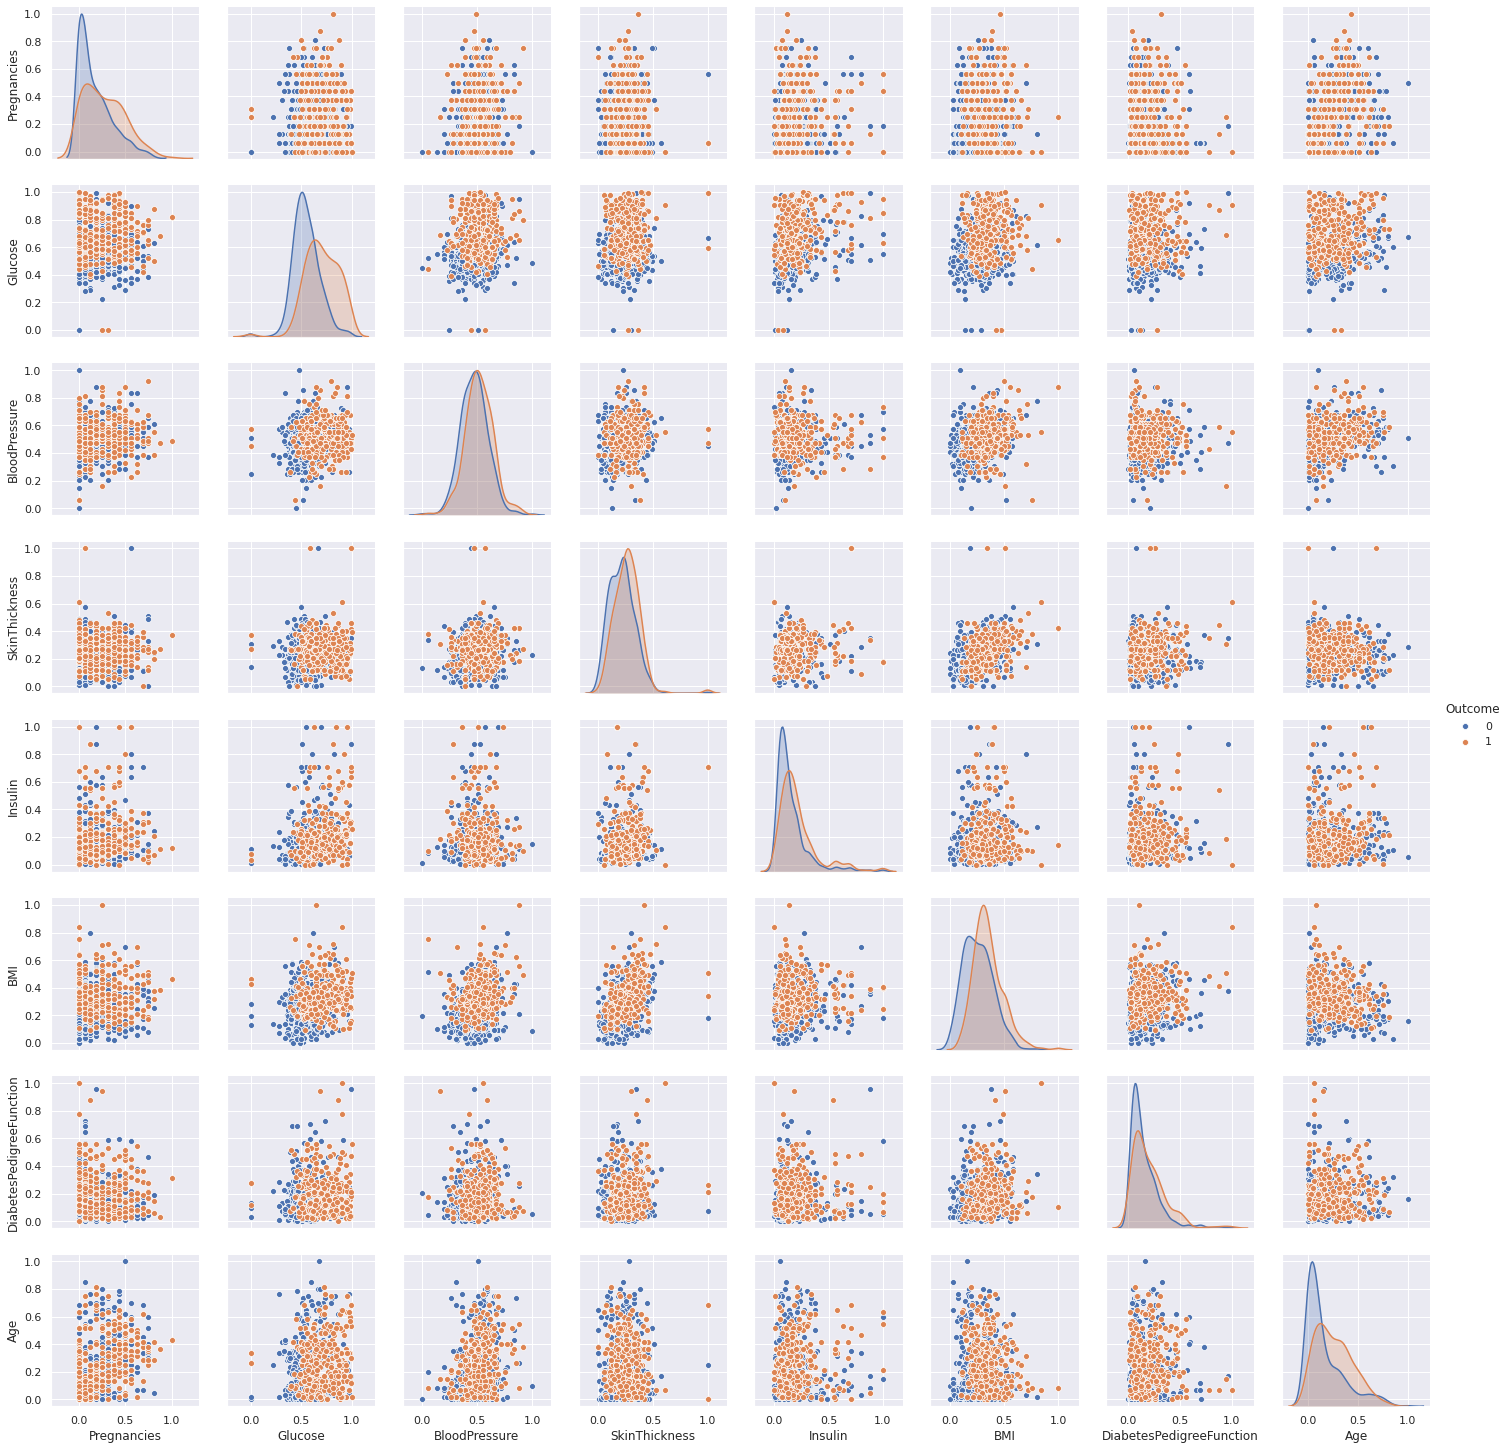

In [4]:
p=sns.pairplot(df, hue = 'Outcome')

- Visualisation by Heat Map

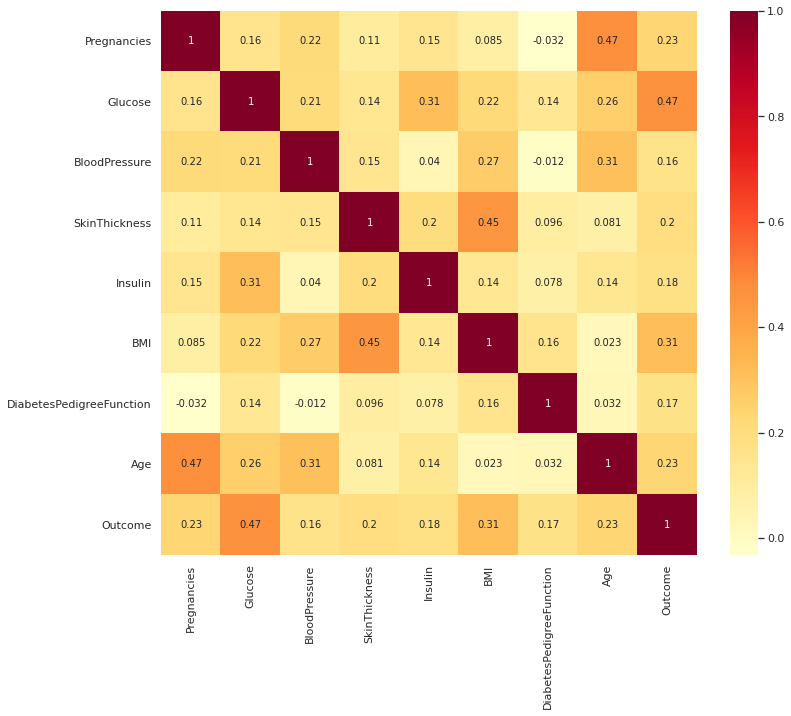

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  
p = sns.heatmap(df.corr(), annot=True,cmap ='YlOrRd')

In [0]:
df.to_csv("dis.csv",index=False,header=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


Importing dependencies for formulating the kNN algorithm

In [0]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt

Function for loading CSV file 

In [0]:
def generate_csv(filen):
	data = list()
	with open(filen, 'r') as file:
		csv_read = reader(file)
		for row in csv_read:
			if not row:
				continue
			data.append(row)
	return data

Converting string column to float

In [0]:
def string_float(data, c):
	for row in data:
		row[c] = float(row[c].strip())

Convert string column to integer

In [0]:
def str_int(data, c):
	c_value = [row[c] for row in data]
	q = set(c_value)
	see = dict()
	for i, value in enumerate(q):
		see[value] = i
	for row in data:
		row[c] = see[row[c]]
	return see

Splitting the dataset into K Folds

In [0]:
def cross_validation_split(data, n_fold):
	data_split = list()
	data_copy = list(data)
	fold_len = int(len(data) / n_fold)
	for _ in range(n_fold):
		f = list()
		while len(f) < fold_len:
			dex = randrange(len(data_copy))
			f.append(data_copy.pop(dex))
		data_split.append(f)
	return data_split

Calculating accuracy

In [0]:
def acc_metrics(original, pred):
	right = 0
	for i in range(len(original)):
		if original[i] == pred[i]:
			right += 1
	return right / float(len(original)) * 100.0

Evaluating using the cross validation split

In [0]:
def eva_algo(data, algo, j, n_fold, *args):
	fold = cross_validation_split(data, n_fold)
	s = list()
	for f in fold:
		t_set = list(fold)
		t_set.remove(f)
		t_set = sum(t_set, [])
		tst_set = list()
		for row in f:
			r_copy = list(row)
			tst_set.append(r_copy)
			r_copy[-1] = None
		pred = algo(t_set, tst_set, j, *args)
		original = [row[-1] for row in f]
		acc = acc_metrics(original, pred)
		s.append(acc)
	return s

Evaluating modules for different distance metrics

- Euclidean Distance

In [0]:
def euclidean_dist(r1, r2):
	dist = 0.0
	for i in range(len(r1)-1):
		dist += (r1[i] - r2[i])**2
	return sqrt(dist)

- Manhattan Distance

In [0]:
def manhattan_dist(r1, r2):
	dist = 0.0
	for i in range(len(r1)-1):
		dist += abs(r1[i] - r2[i])
	return dist

- Minkowski Distance

In [0]:
def minkowski_dist(r1,r2, pval=3):
	dist = 0.0
	for i in range(len(r1)-1):
		dist += pow(abs(r1[i] - r2[i]),pval)
	return pow(dist,(1/pval))

Getting nearest neighbours

In [0]:
def g_neigh(train, test_r, n_neigh, j):
	distance = list()
	for train_r in train:
		dist = j(test_r, train_r)
		distance.append((train_r, dist))
	distance.sort(key=lambda tup: tup[1])
	neighbor = list()
	for i in range(n_neigh):
		neighbor.append(distance[i][0])
	return neighbor

Making a prediction with neighbors

In [0]:
def pred_class(train, tst_r, n_neigh, j):
	neighbor = g_neigh(train, tst_r, n_neigh, j)
	output = [row[-1] for row in neighbor]
	pred = max(set(output), key=output.count)
	return pred

kNN Algorithm

In [0]:
def k_near_neigh(train, tst, j, n_neigh):
	pred = list()
	for r in tst:
		output = pred_class(train, r, n_neigh, j)
		pred.append(output)
	return(pred)

Loading the dataset and calling the above functions for different distance metrics with variable k values for not normalised data

['6.0', '148', '72.0', '35.0', '94.0', '33.6', '0.627', '50.0', '1']
***************Euclidean Distance******************
**********************************************************
Value of K =  2
Scores: [59.47712418300654, 67.3202614379085, 65.359477124183, 66.66666666666666, 61.43790849673203]
Mean Accuracy: 64.052%
Max Accuracy  67.3202614379085
**********************************************************
**********************************************************
Value of K =  3
Scores: [67.3202614379085, 79.73856209150327, 71.24183006535948, 74.50980392156863, 64.70588235294117]
Mean Accuracy: 71.503%
Max Accuracy  79.73856209150327
**********************************************************
**********************************************************
Value of K =  4
Scores: [63.39869281045751, 67.3202614379085, 66.01307189542483, 73.20261437908496, 69.28104575163398]
Mean Accuracy: 67.843%
Max Accuracy  73.20261437908496
**********************************************************
******

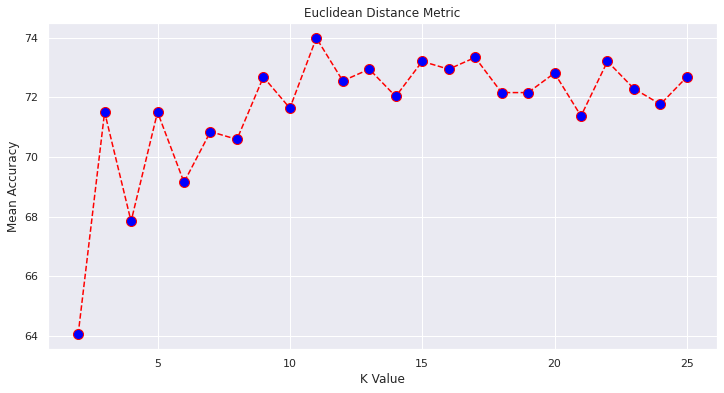

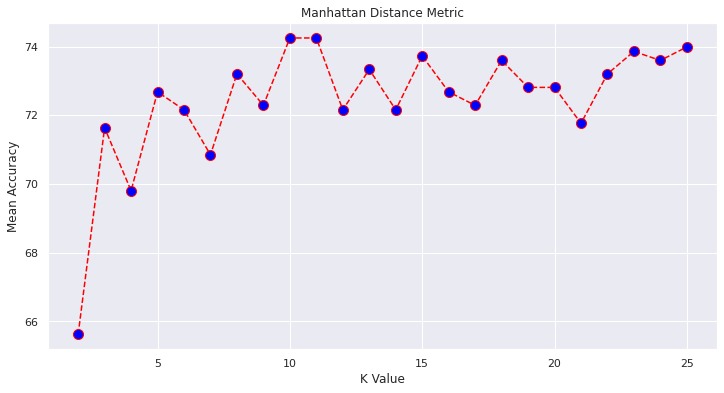

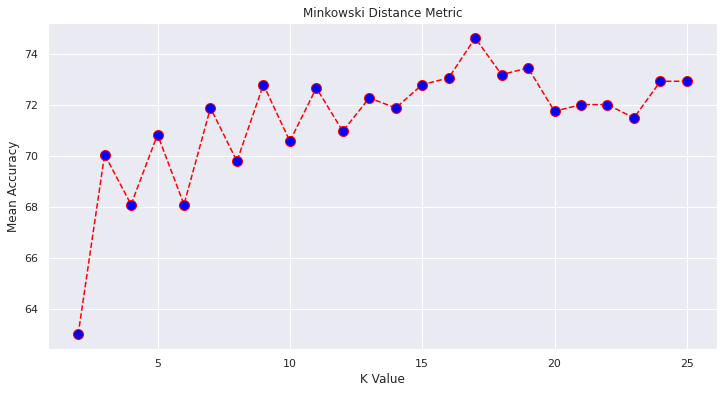

In [21]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
seed(1)
filen = 'dis_notNormal.csv'
data = generate_csv(filen)
print(data[0])
for i in range(len(data[0])-1):
	string_float(data, i)


str_int(data, len(data[0])-1)

n_fold = 5
n_neigh = [i for i in range(2,26)]


functions = [euclidean_dist,manhattan_dist,minkowski_dist]
li = ["Euclidean Distance","Manhattan Distance","Minkowski Distance"]
max_max_max = []
mean_mean_mean = []
for j,k in zip(functions,li):
  acc_mean = []
  acc_max = []
  print("***************" + k + "******************")
  for i in n_neigh:
    print("**********************************************************")
    print("Value of K = ",i)
    s = eva_algo(data, k_near_neigh, j, n_fold,i) 
    print('Scores: %s' % s)
    print('Mean Accuracy: %.3f%%' % (sum(s)/float(len(s))))
    acc_mean.append((sum(s)/float(len(s))))
    print("Max Accuracy ",max(s))
    acc_max.append(max(s))
    print("**********************************************************")
  mean_mean_mean.append(max(acc_mean))
  max_max_max.append(max(acc_max))
  print("Max of all Max accuracies: ",max(acc_max))
  print("Max of all Mean Accuracies: ",max(acc_mean))
  plt.figure(figsize=(12, 6))
  plt.plot(range(2, 26), acc_mean, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
  plt.title(k + " Metric")
  plt.xlabel('K Value')
  plt.ylabel('Mean Accuracy')
print()
print()
print("**********************************************************")
print("Maximum accuracy of Max Accuracy from all distances metrics " + str(max(max_max_max)))
print("Maximum accuracy of Mean Accuracy from all distances metrics " + str(max(mean_mean_mean)))


With normalisation

['0.3125', '0.7437185929648241', '0.48979591836734687', '0.3043478260869565', '0.09615384615384615', '0.3149284253578733', '0.23441502988898377', '0.4833333333333334', '1']
***************Euclidean Distance******************
**********************************************************
Value of K =  2
Scores: [68.62745098039215, 66.01307189542483, 67.3202614379085, 69.28104575163398, 58.16993464052288]
Mean Accuracy: 65.882%
Max Accuracy  69.28104575163398
**********************************************************
**********************************************************
Value of K =  3
Scores: [64.05228758169935, 73.8562091503268, 72.54901960784314, 70.58823529411765, 71.89542483660131]
Mean Accuracy: 70.588%
Max Accuracy  73.8562091503268
**********************************************************
**********************************************************
Value of K =  4
Scores: [69.28104575163398, 69.93464052287581, 74.50980392156863, 71.89542483660131, 70.58823529411765]
Mean Accuracy

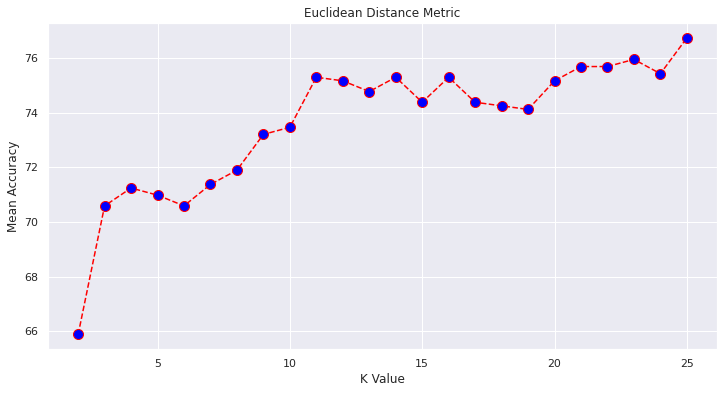

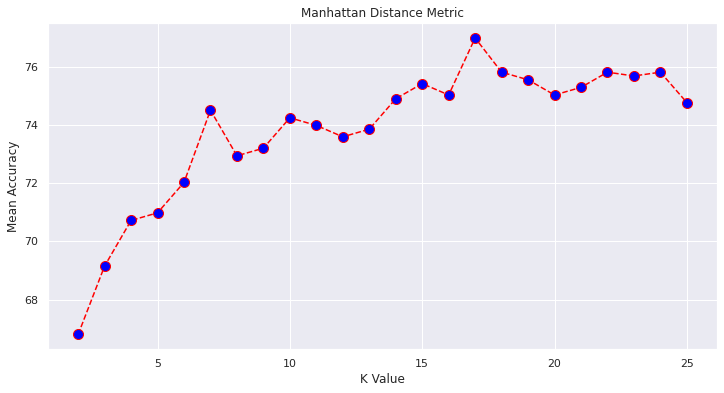

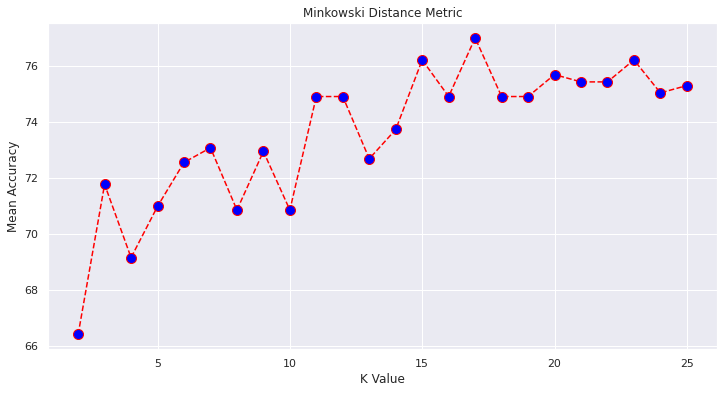

In [22]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
seed(1)
filen = 'dis.csv'
data = generate_csv(filen)
print(data[0])
for i in range(len(data[0])-1):
	string_float(data, i)


str_int(data, len(data[0])-1)

n_fold = 5
n_neigh = [i for i in range(2,26)]


functions = [euclidean_dist,manhattan_dist,minkowski_dist]
li = ["Euclidean Distance","Manhattan Distance","Minkowski Distance"]
max_max_max = []
mean_mean_mean = []
for j,k in zip(functions,li):
  acc_mean = []
  acc_max = []
  print("***************" + k + "******************")
  for i in n_neigh:
    print("**********************************************************")
    print("Value of K = ",i)
    s = eva_algo(data, k_near_neigh, j, n_fold,i) 
    print('Scores: %s' % s)
    print('Mean Accuracy: %.3f%%' % (sum(s)/float(len(s))))
    acc_mean.append((sum(s)/float(len(s))))
    print("Max Accuracy ",max(s))
    acc_max.append(max(s))
    print("**********************************************************")
  mean_mean_mean.append(max(acc_mean))
  max_max_max.append(max(acc_max))
  print("Max of all Max accuracies: ",max(acc_max))
  print("Max of all Mean Accuracies: ",max(acc_mean))
  plt.figure(figsize=(12, 6))
  plt.plot(range(2, 26), acc_mean, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
  plt.title(k + " Metric")
  plt.xlabel('K Value')
  plt.ylabel('Mean Accuracy')
print()
print()
print("**********************************************************")
print("Maximum accuracy of Max Accuracy from all distances metrics " + str(max(max_max_max)))
print("Maximum accuracy of Mean Accuracy from all distances metrics " + str(max(mean_mean_mean)))


Feature Ablation Study

In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/diabetes.csv")
df.head()
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2
import pprint
df = df.replace(0.0,np.NaN)
df.fillna(method='bfill',inplace=True)
df.fillna(method='ffill',inplace=True)
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
y = df['Outcome'].values
print(type(y))
df =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
df['Outcome'] = y
d = df["Outcome"]
X = df.drop('Outcome',axis=1)
X_new = SelectKBest(chi2, k=3).fit_transform(X,d)
X_new.shape
features_columns = df.columns

fs = SelectKBest(k=5)
fs.fit(X,d)
top_features = zip(fs.get_support(),features_columns)

print("The top 5 features are: ")
top_features_1 = []
pp = pprint.PrettyPrinter(depth=4)
print
for i,j in top_features:
    if i==True:
        pp.pprint(j)
        top_features_1.append(j)

print(top_features_1)
top_features_1.append('Outcome')
df_copy = df[top_features_1].copy()

df_copy.head()

df_copy.to_csv("ablation.csv",index=False,header=False)


<class 'numpy.ndarray'>
The top 5 features are: 
'Pregnancies'
'Glucose'
'SkinThickness'
'BMI'
'Age'
['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']


['0.3125', '0.7437185929648241', '0.3043478260869565', '0.3149284253578733', '0.4833333333333334', '1']
***************Euclidean Distance******************
**********************************************************
Value of K =  2
Scores: [65.359477124183, 66.01307189542483, 72.54901960784314, 72.54901960784314, 58.16993464052288]
Mean Accuracy: 66.928%
Max Accuracy  72.54901960784314
**********************************************************
**********************************************************
Value of K =  3
Scores: [64.05228758169935, 77.12418300653596, 70.58823529411765, 71.89542483660131, 74.50980392156863]
Mean Accuracy: 71.634%
Max Accuracy  77.12418300653596
**********************************************************
**********************************************************
Value of K =  4
Scores: [69.93464052287581, 71.89542483660131, 73.8562091503268, 66.01307189542483, 72.54901960784314]
Mean Accuracy: 70.850%
Max Accuracy  73.8562091503268
****************************

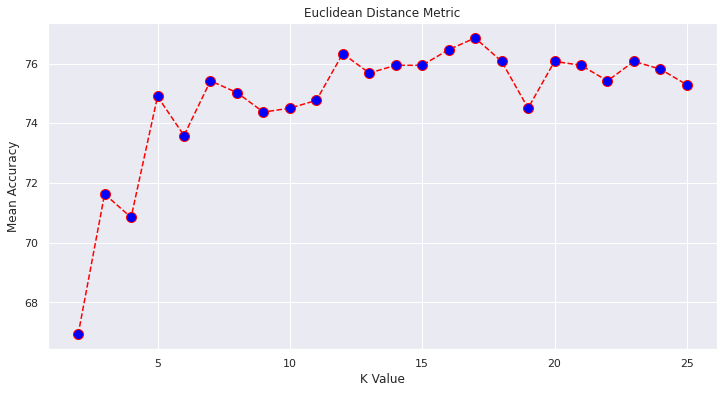

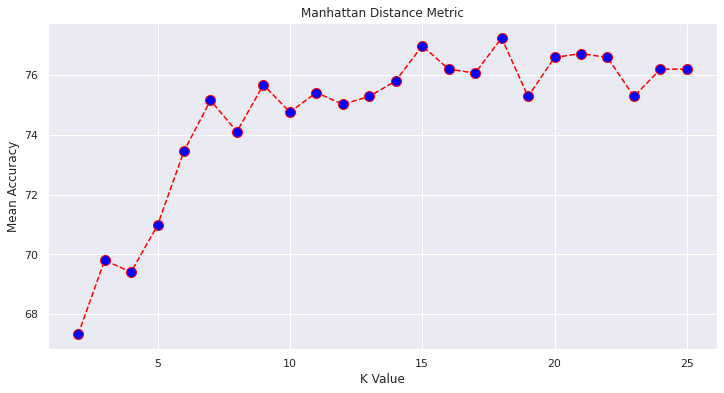

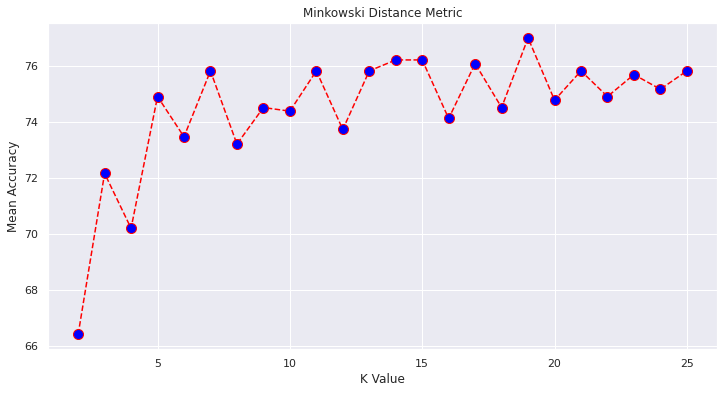

In [24]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
seed(1)
filen = 'ablation.csv'
data = generate_csv(filen)
print(data[0])
for i in range(len(data[0])-1):
	string_float(data, i)


str_int(data, len(data[0])-1)

n_fold = 5
n_neigh = [i for i in range(2,26)]


functions = [euclidean_dist,manhattan_dist,minkowski_dist]
li = ["Euclidean Distance","Manhattan Distance","Minkowski Distance"]
max_max_max = []
mean_mean_mean = []
for j,k in zip(functions,li):
  acc_mean = []
  acc_max = []
  print("***************" + k + "******************")
  for i in n_neigh:
    print("**********************************************************")
    print("Value of K = ",i)
    s = eva_algo(data, k_near_neigh, j, n_fold,i) 
    print('Scores: %s' % s)
    print('Mean Accuracy: %.3f%%' % (sum(s)/float(len(s))))
    acc_mean.append((sum(s)/float(len(s))))
    print("Max Accuracy ",max(s))
    acc_max.append(max(s))
    print("**********************************************************")
  mean_mean_mean.append(max(acc_mean))
  max_max_max.append(max(acc_max))
  print("Max of all Max accuracies: ",max(acc_max))
  print("Max of all Mean Accuracies: ",max(acc_mean))
  plt.figure(figsize=(12, 6))
  plt.plot(range(2, 26), acc_mean, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
  plt.title(k + " Metric")
  plt.xlabel('K Value')
  plt.ylabel('Mean Accuracy')
print()
print()
print("**********************************************************")
print("Maximum accuracy of Max Accuracy from all distances metrics " + str(max(max_max_max)))
print("Maximum accuracy of Mean Accuracy from all distances metrics " + str(max(mean_mean_mean)))


**Result** 

- Without Normalisation (Maximum Accuracy)
1. Euclidean - 81.69%
2. Manhattan - 80.39%
3. Minkowski - 79.73%

- With Normalisation (Maximum Accuracy)
1. Euclidean - 81.69%
2. Manhattan - 83.00%
3. Minkowski - 82.35%

- Ablation Study
##### Taking the top 5 features
features = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']
1. Euclidean - 84.97%
2. Manhattan - 83.00%
3. Minkowski - 84.31%



**Analysis**

(Answer to question 1 and question 2 are in the code above)

(Answer to Question 3a)
1. We performed the KNN Classification using both the normalized dataset and the unnormalized dataset, and we infered that the accuracy was better in all the distance metrics when we take the **normalized dataset**. THe reason being that KNN as an algorithm fundamentally depends on the distance between the data points.

(Answer to Question 3b)
2. We used three different distance metrics, (Euclidean,Manhattan,Minkowski) and we found that that euclidean metric performed the best in case of data with top 5 features and un normalized data, where as in case of normalized data, Manhattan distance metric performed the best.

(Answer to Question 3c)
3. All the computations have been done with K value ranging between 2 to 25 and the same can be visualized w.r.t. the accuracy from the graphs described above in the code. 

(Answer to Question 4)
4. We performed feature ablation study and performed Kmeans algorithm on the datset with top 5 extracted features and we noticed an increase in accuracy for all the distance metrics. The top 5 features are mentioned above.

